In [9]:
import numpy as np
import pandas as pd
from pygmid import Lookup as lk
import matplotlib.pyplot as plt

#### Technology data

In [10]:
table_path = '/home/bmurmann/eda/designs/Book-on-gm-ID-design/starter_files_open_source_tools/ihp-sg13g2/simulation/'
n = lk(table_path+'sg13_lv_nmos.mat')

#### Specifications

In [11]:
av0 = 4; rs = 10e3; cl = 200e-15

#### Design choices

In [12]:
l = 0.13; wfing = 5; gm_id = np.linspace(8, 25, num=100); rd = 1e3


#### Sizing and benchmarking

In [13]:
gmrds = n.lookup('GM_GDS', GM_ID=gm_id, L=l)
gm = 1/rd*(1/av0 - 1/gmrds)**-1
id = gm/gm_id 
w = id/n.lookup('ID_W', GM_ID=gm_id, L=l)
nf = 1+np.floor_divide(w, wfing)

# Compute capacitances
cgs = w*n.lookup('CGS_W', GM_ID=gm_id, L=l)
cgd = w*n.lookup('CGD_W', GM_ID=gm_id, L=l)
cdd = w*n.lookup('CDD_W', GM_ID=gm_id, L=l)
cdb = cdd-cgd
cltot = cl+cdb

# Estimate bandwidth
rds = gmrds/gm
rdtot = rds*rd/(rds+rd)
tau1 = rs*(cgs + cgd*(1+av0)) + rdtot*(cltot+cgd)
bw = 1/2/np.pi/tau1

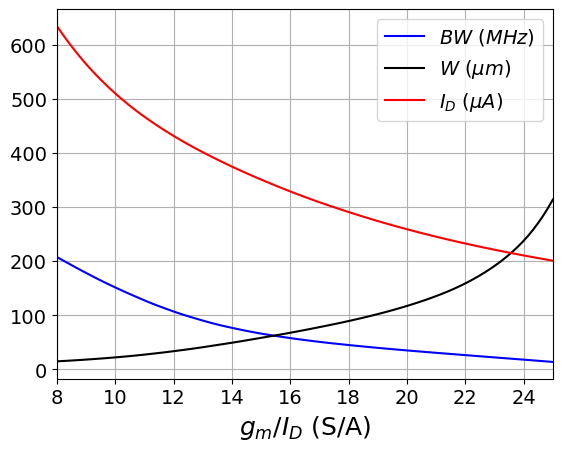

In [37]:
plt.plot(gm_id, bw/1e6, label='$BW$ ($MHz$)', color='blue', linestyle='-')
plt.plot(gm_id, w, label=r'$W$ ($\mu m$)', color='black', linestyle='-')
plt.plot(gm_id, id/1e-6, label=r'$I_D$ ($\mu A$)', color='red', linestyle='-')
plt.xlim(8, 25)
plt.xlabel("$g_m/I_D$ (S/A)", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.legend(fontsize=14)
plt.show()